In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_wine

In [8]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [11]:
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


<Axes: >

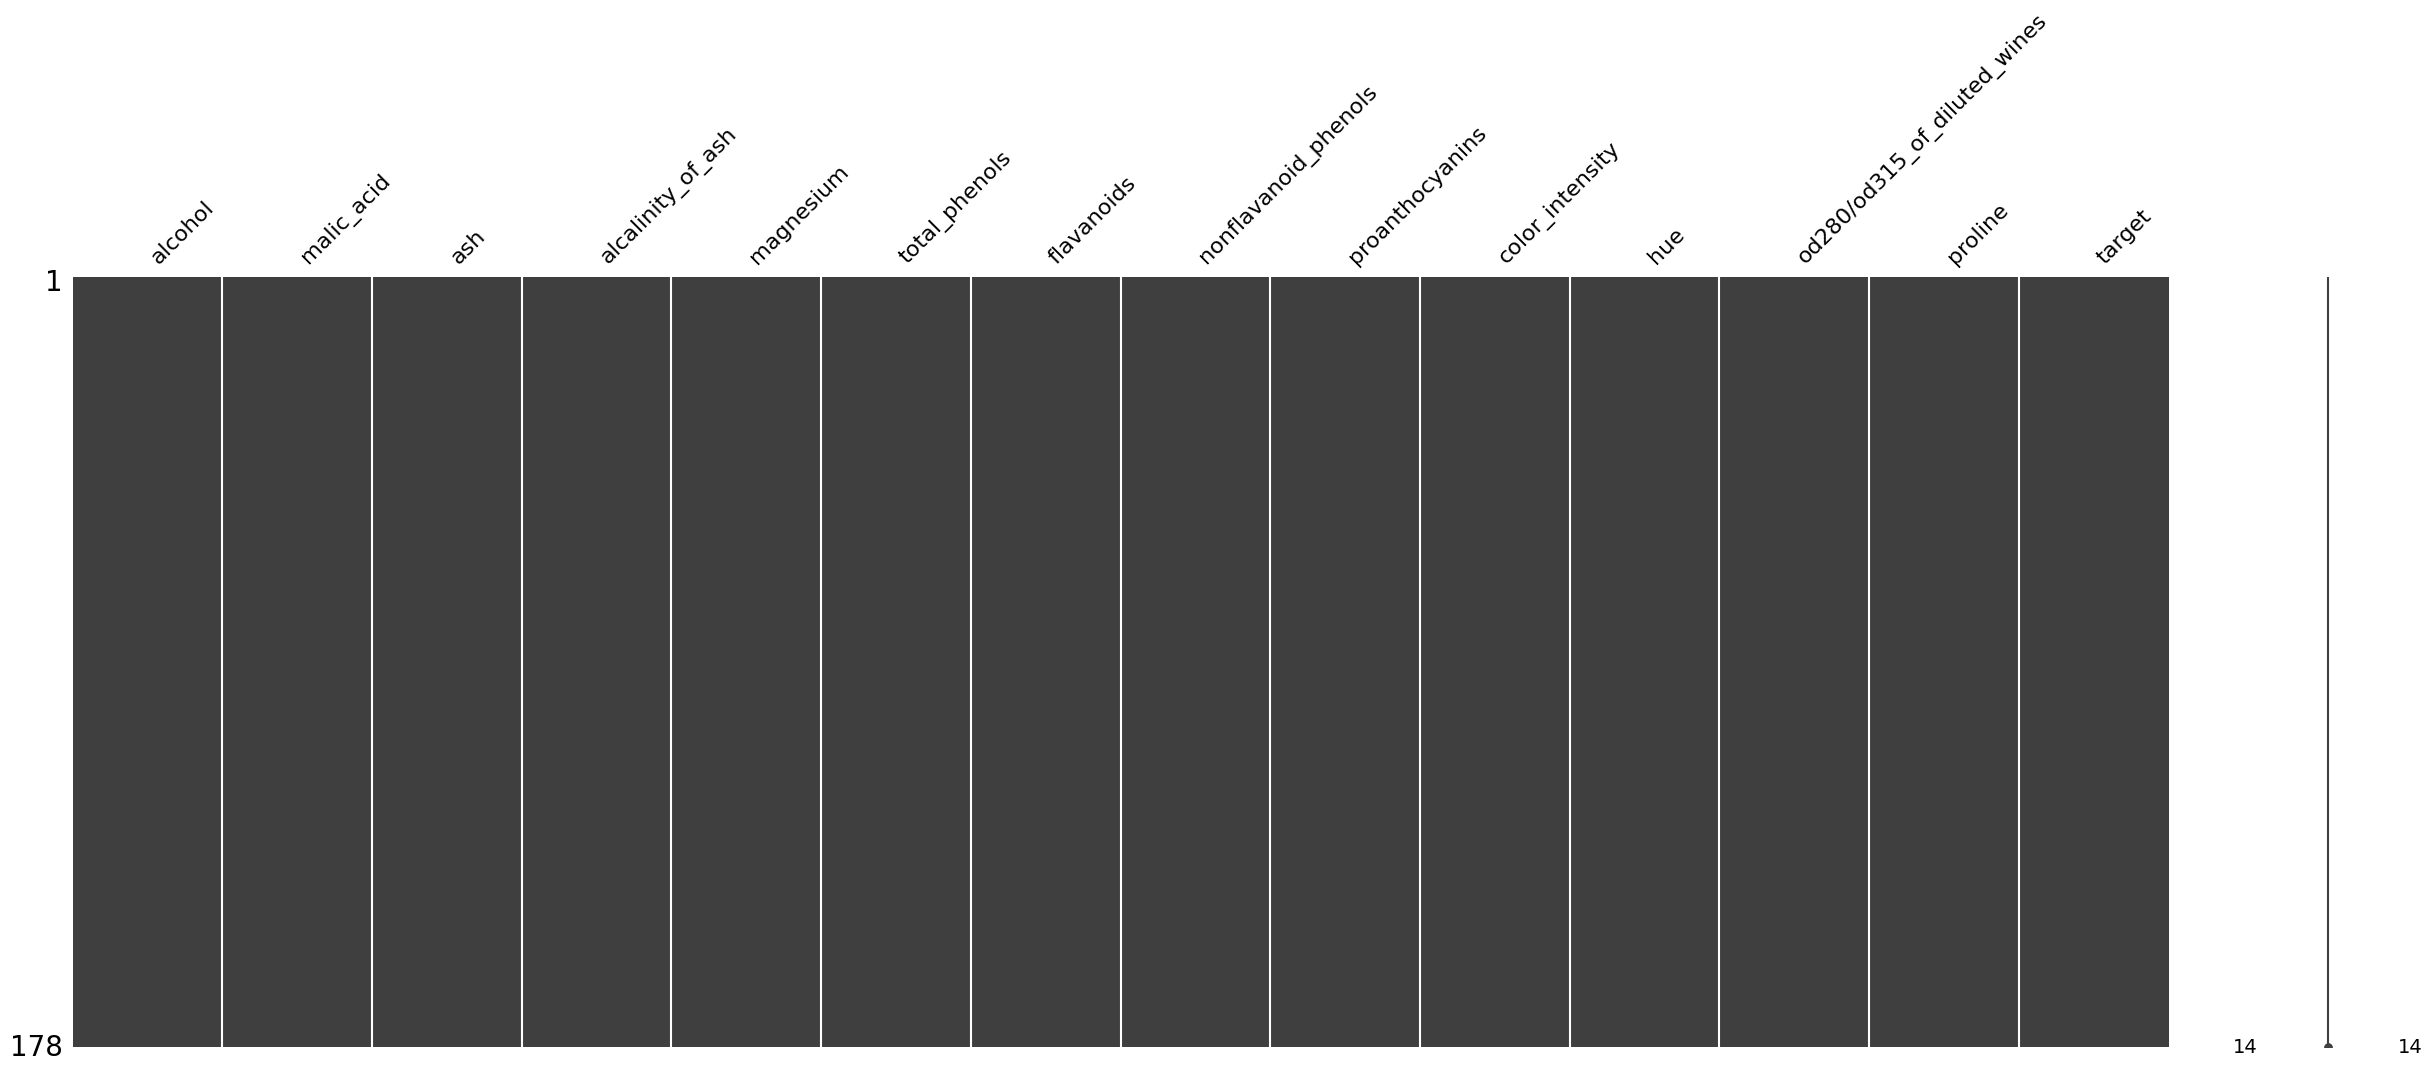

In [12]:
import missingno

missingno.matrix(wine_df,figsize=(30,10))

THERE ARE NO MISSING VALUES

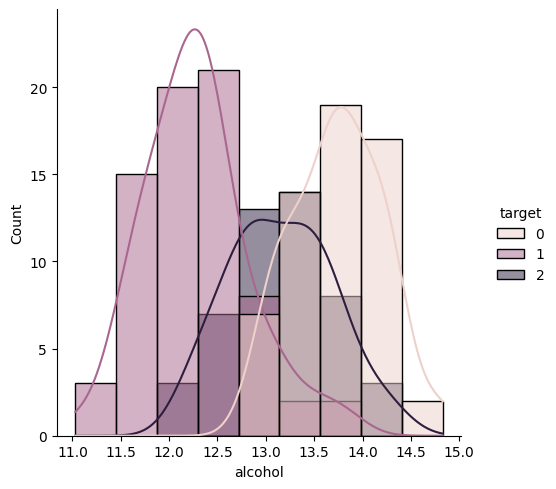

In [13]:
sns.displot(data=wine_df,x='alcohol',hue='target',kde=True)

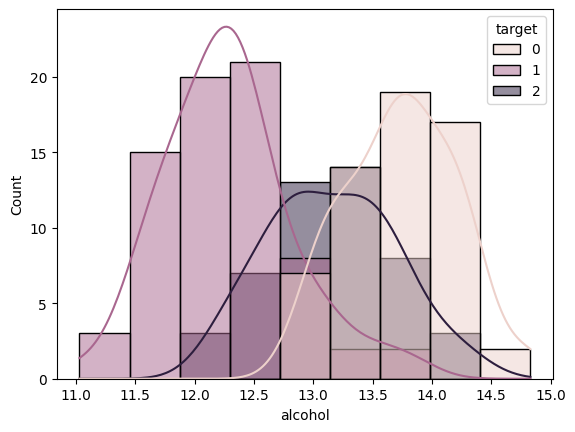

In [14]:
sns.histplot(data=wine_df, x="alcohol", hue="target", kde=True)
plt.show()

<Axes: xlabel='alcohol', ylabel='hue'>

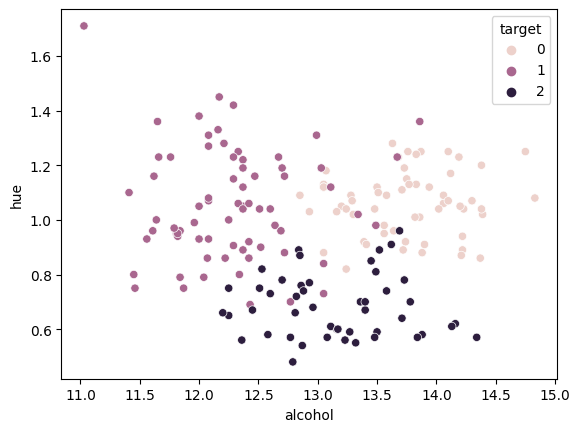

In [17]:
sns.scatterplot(data=wine_df, x='alcohol',y='hue',hue='target')

In [18]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scors(x,y):
    mi_scores = mutual_info_regression(x,y)
    mi_scores = pd.Series(mi_scores,name='MI scores',index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

x = wine_df.drop('target',axis='columns')
y = wine_df['target']

mi_scores = make_mi_scors(x,y)
mi_scores[::3]

flavanoids                      0.678005
od280/od315_of_diluted_wines    0.514642
total_phenols                   0.412871
alcalinity_of_ash               0.276819
ash                             0.067169
Name: MI scores, dtype: float64

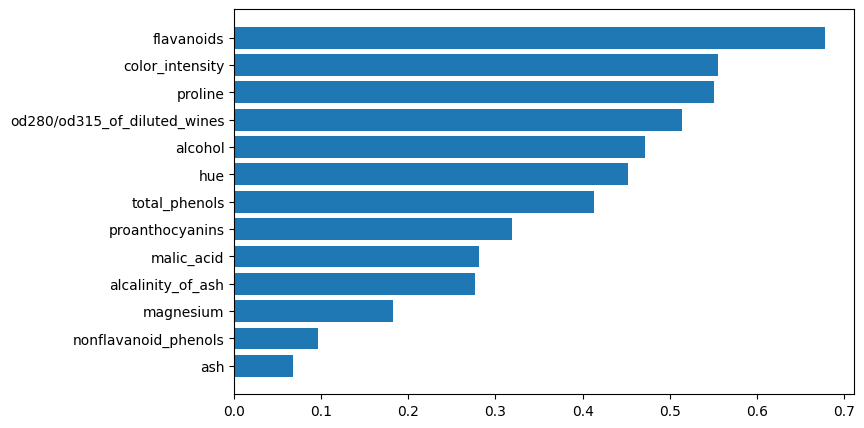

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

In [20]:
x = x.drop(['nonflavanoid_phenols','ash'],axis='columns')

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

COMPARE TWO MODELS

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

g_model = GaussianNB()
m_model = MultinomialNB()

def find_accuracy(x_train,x_test,y_train,y_test,*models_list):
    cross_score = {}
    scores = {}
    for model in models_list:
        model.fit(x_train,y_train)
        scores.setdefault(model, model.score(x_test,y_test) )
        cross_score.setdefault(model, cross_val_score(model,x,y))
    return scores, cross_score

cros_score = find_accuracy(x_train,x_test,y_train,y_test,g_model,m_model)[1] 
print(cros_score)
score = find_accuracy(x_train,x_test,y_train,y_test,g_model,m_model)[0] 
print(score)

{GaussianNB(): array([0.91666667, 0.97222222, 0.97222222, 0.91428571, 0.97142857]), MultinomialNB(): array([0.75      , 0.75      , 0.80555556, 0.91428571, 1.        ])}
{GaussianNB(): 0.9777777777777777, MultinomialNB(): 0.8666666666666667}


ACCORDING TO THE FUNCTION RESULTS WE MUST USE GAUSSIAN MODEL FOR MAKING PREDICTIONS

In [50]:
g_model.fit(x_train,y_train)
y_pred = g_model.predict(x_test)
y_pred[:10]

array([2, 1, 1, 0, 1, 1, 0, 1, 0, 2])

In [51]:
y_test.to_numpy()[:10]

array([2, 1, 1, 0, 1, 1, 0, 1, 0, 1])

Text(95.72222222222221, 0.5, 'Truth')

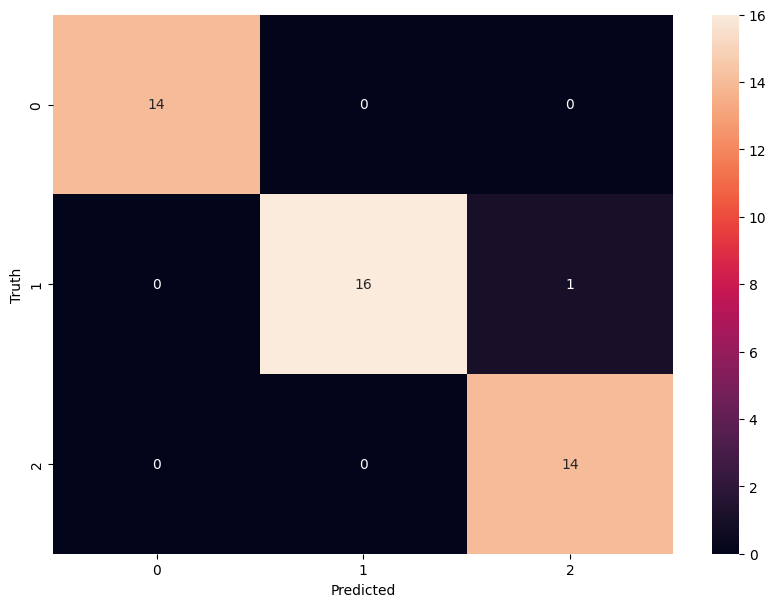

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')